In [1]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from mrcnn.config import Config
from mrcnn.model import MaskRCNN

Using TensorFlow backend.


In [2]:
class MilitaryDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        # define classes
        self.add_class("dataset", 1, "Airplane")
        self.add_class("dataset", 2, "Helicopter")
        self.add_class("dataset", 3, "Person")
        self.add_class("dataset", 4, "Tank")
        self.add_class("dataset", 5, "Vehicle")
        self.add_class("dataset", 6, "airplane")
        
        # define data locations
        images_dir = dataset_dir + '/rename_train_photo/'
        annotations_dir = dataset_dir + '/rename_train_data/'
       
             
		# find all images
        for filename in listdir(images_dir):
            print(filename)
			# extract image id
            image_id = filename[:-4]
			#print('IMAGE ID: ',image_id)
			
			# skip all images after 115 if we are building the train set
            if is_train and int(image_id) >= 4500:
                continue
			# skip all images before 115 if we are building the test/val set
            if not is_train and int(image_id) < 4500 :
                continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path, class_ids = [0,1,2,3,4,5,6])
    	# extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
		# load and parse the file
        tree = ElementTree.parse(filename)
		# get the root of the document
        root = tree.getroot()
		# extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text   #Add label name to the box list
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax, name]
            boxes.append(coors)
		# extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height
    def load_mask(self, image_id):
		# get details of image
        info = self.image_info[image_id]
		# define box file location
        path = info['annotation']
        #return info, path
		# load XML
        boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            
            
            # box[4] will have the name of the class 
            if (box[4] == "Airplane"):
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index("Airplane"))
            elif(box[4] == "Helicopter"):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index("Helicopter")) 
            elif(box[4] == "Person"):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index("Person"))
            elif(box[4] == "Tank"):
                masks[row_s:row_e, col_s:col_e, i] = 4
                class_ids.append(self.class_names.index("Tank"))
            elif(box[4] == "Vehicle"):
                masks[row_s:row_e, col_s:col_e, i] = 5
                class_ids.append(self.class_names.index("Vehicle"))
            elif(box[4] == "airplane"):
                masks[row_s:row_e, col_s:col_e, i] = 6
                class_ids.append(self.class_names.index("airplane"))
          
        return masks, asarray(class_ids, dtype='int32')
        

	# load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']


In [3]:
dataset_dir='D:/Tanks/Mask-RCNN-TF2-master/dataset'

In [4]:
train_set = MilitaryDataset()

In [5]:
train_set.load_dataset(dataset_dir, is_train=True)

0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
0006.jpg
0007.jpg
0008.jpg
0009.jpg
0010.jpg
0011.jpg
0012.jpg
0013.jpg
0014.jpg
0015.jpg
0016.jpg
0017.jpg
0018.jpg
0019.jpg
0020.jpg
0021.jpg
0022.jpg
0023.jpg
0024.jpg
0025.jpg
0026.jpg
0027.jpg
0028.jpg
0029.jpg
0030.jpg
0031.jpg
0032.jpg
0033.jpg
0034.jpg
0035.jpg
0036.jpg
0037.jpg
0038.jpg
0039.jpg
0040.jpg
0041.jpg
0042.jpg
0043.jpg
0044.jpg
0045.jpg
0046.jpg
0047.jpg
0048.jpg
0049.jpg
0050.jpg
0051.jpg
0052.jpg
0053.jpg
0054.jpg
0055.jpg
0056.jpg
0057.jpg
0058.jpg
0059.jpg
0060.jpg
0061.jpg
0062.jpg
0063.jpg
0064.jpg
0065.jpg
0066.jpg
0067.jpg
0068.jpg
0069.jpg
0070.jpg
0071.jpg
0072.jpg
0073.jpg
0074.jpg
0075.jpg
0076.jpg
0077.jpg
0078.jpg
0079.jpg
0080.jpg
0081.jpg
0082.jpg
0083.jpg
0084.jpg
0085.jpg
0086.jpg
0087.jpg
0088.jpg
0089.jpg
0090.jpg
0091.jpg
0092.jpg
0093.jpg
0094.jpg
0095.jpg
0096.jpg
0097.jpg
0098.jpg
0099.jpg
0100.jpg
0101.jpg
0102.jpg
0103.jpg
0104.jpg
0105.jpg
0106.jpg
0107.jpg
0108.jpg
0109.jpg
0110.jpg
0111.jpg
0

In [6]:
train_set.prepare()

In [7]:
print('Train: %d' % len(train_set.image_ids))

Train: 4499


In [8]:
# test/val set
test_set = MilitaryDataset()
test_set.load_dataset(dataset_dir, is_train=False)
test_set.prepare()

0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
0006.jpg
0007.jpg
0008.jpg
0009.jpg
0010.jpg
0011.jpg
0012.jpg
0013.jpg
0014.jpg
0015.jpg
0016.jpg
0017.jpg
0018.jpg
0019.jpg
0020.jpg
0021.jpg
0022.jpg
0023.jpg
0024.jpg
0025.jpg
0026.jpg
0027.jpg
0028.jpg
0029.jpg
0030.jpg
0031.jpg
0032.jpg
0033.jpg
0034.jpg
0035.jpg
0036.jpg
0037.jpg
0038.jpg
0039.jpg
0040.jpg
0041.jpg
0042.jpg
0043.jpg
0044.jpg
0045.jpg
0046.jpg
0047.jpg
0048.jpg
0049.jpg
0050.jpg
0051.jpg
0052.jpg
0053.jpg
0054.jpg
0055.jpg
0056.jpg
0057.jpg
0058.jpg
0059.jpg
0060.jpg
0061.jpg
0062.jpg
0063.jpg
0064.jpg
0065.jpg
0066.jpg
0067.jpg
0068.jpg
0069.jpg
0070.jpg
0071.jpg
0072.jpg
0073.jpg
0074.jpg
0075.jpg
0076.jpg
0077.jpg
0078.jpg
0079.jpg
0080.jpg
0081.jpg
0082.jpg
0083.jpg
0084.jpg
0085.jpg
0086.jpg
0087.jpg
0088.jpg
0089.jpg
0090.jpg
0091.jpg
0092.jpg
0093.jpg
0094.jpg
0095.jpg
0096.jpg
0097.jpg
0098.jpg
0099.jpg
0100.jpg
0101.jpg
0102.jpg
0103.jpg
0104.jpg
0105.jpg
0106.jpg
0107.jpg
0108.jpg
0109.jpg
0110.jpg
0111.jpg
0

In [9]:
print('Test: %d' % len(test_set.image_ids))

Test: 2134


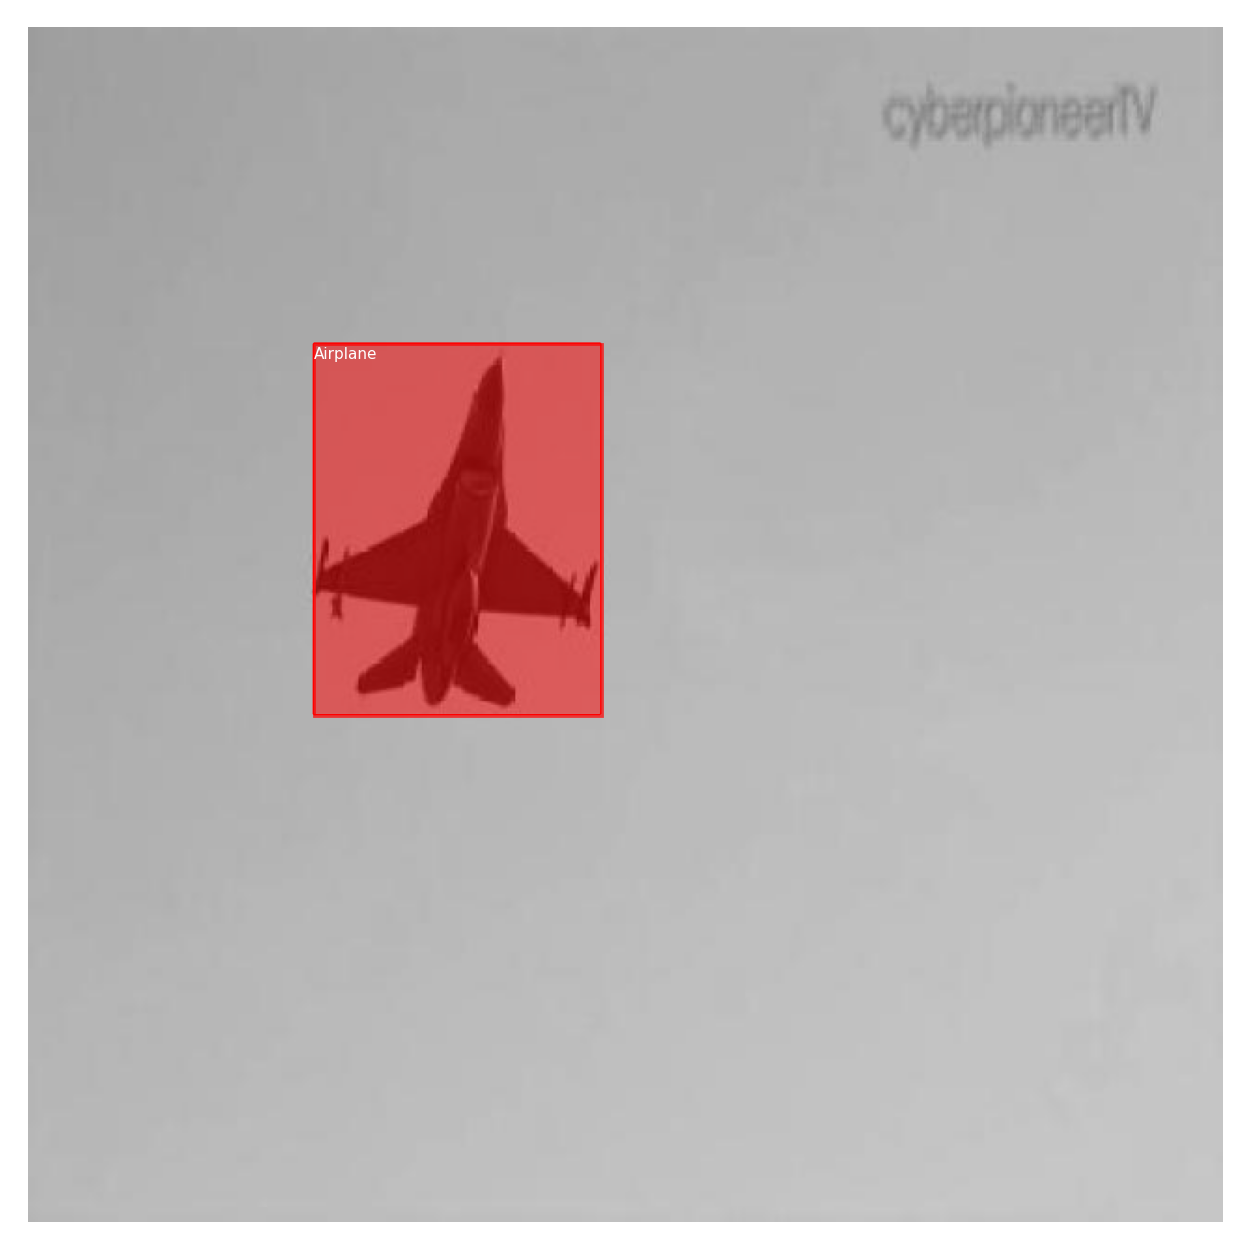

In [10]:
import random
num=random.randint(0, len(train_set.image_ids))
# define image id
image_id = num
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

In [11]:
# define a configuration for the model
class MilitaryConfig(Config):
	# define the name of the configuration
	NAME = "military_cfg"
	# number of classes (background + 3 fruits)
	NUM_CLASSES = 1 + 6
	# number of training steps per epoch
	STEPS_PER_EPOCH = 100

In [12]:
# prepare config
config = MilitaryConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [13]:
import os
ROOT_DIR = os.path.abspath("./")
# Directory to save logs and trained model
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

In [15]:
# define the model
model = MaskRCNN(mode='training', model_dir=DEFAULT_LOGS_DIR, config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights("D:/Tanks/Mask-RCNN-TF2-master/mask_rcnn_coco.h5", by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [16]:
model.log_dir=DEFAULT_LOGS_DIR

In [17]:
DEFAULT_LOGS_DIR

'D:\\Tanks\\Mask-RCNN-TF2-master\\logs'

In [18]:
train_set.image_ids

array([   0,    1,    2, ..., 4496, 4497, 4498])

In [19]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=10, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: D:\Tanks\Mask-RCNN-TF2-master\logs\train\mask_rcnn_military_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask

D:\Tanks\venv\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10


KeyboardInterrupt: 

In [14]:
from matplotlib.patches import Rectangle


# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "military_cfg"
	# number of classes (background + 3 fruits)
	NUM_CLASSES = 1 + 6
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
 

In [15]:
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='logs', config=cfg)
# load model weights
model.load_weights('logs/train/mask_rcnn_military_cfg_0010.h5', by_name=True)

In [16]:
import skimage

In [17]:
tank_img = skimage.io.imread("dataset/tanksp3.jpg")
detected = model.detect([tank_img])[0] 

[ 37  15 148 219]
4
Detected class is : Tank
[ 69 200 121 261]
4
Detected class is : Tank
[ 22 120  64 139]
3
Detected class is : Person


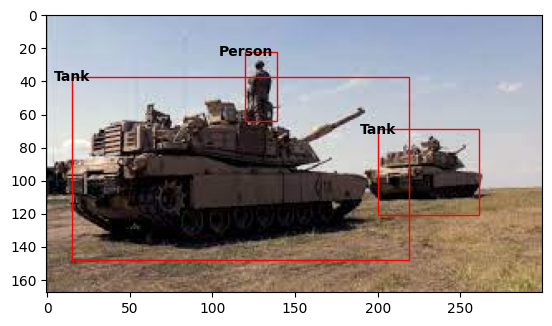

In [18]:
pyplot.imshow(tank_img)
ax = pyplot.gca()
class_names = ["Airplane", "Helicopter", "Person","Tank","Vehicle","airplane"]
class_id_counter=1
for box in detected['rois']:
    print(box)
#get coordinates
    detected_class_id = detected['class_ids'][class_id_counter-1]
    print(detected_class_id)
    print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
#draw the box
    ax.add_patch(rect)
    class_id_counter+=1

In [136]:
import cv2

In [137]:
import mrcnn

In [195]:
image = cv2.imread("dataset/maket3.jpg")

In [196]:
class_names = ['null',"Airplane", "Helicopter", "Person","Tank","Vehicle","airplane"]

In [197]:
r = model.detect([image], verbose=0)

In [198]:
r = r[0]

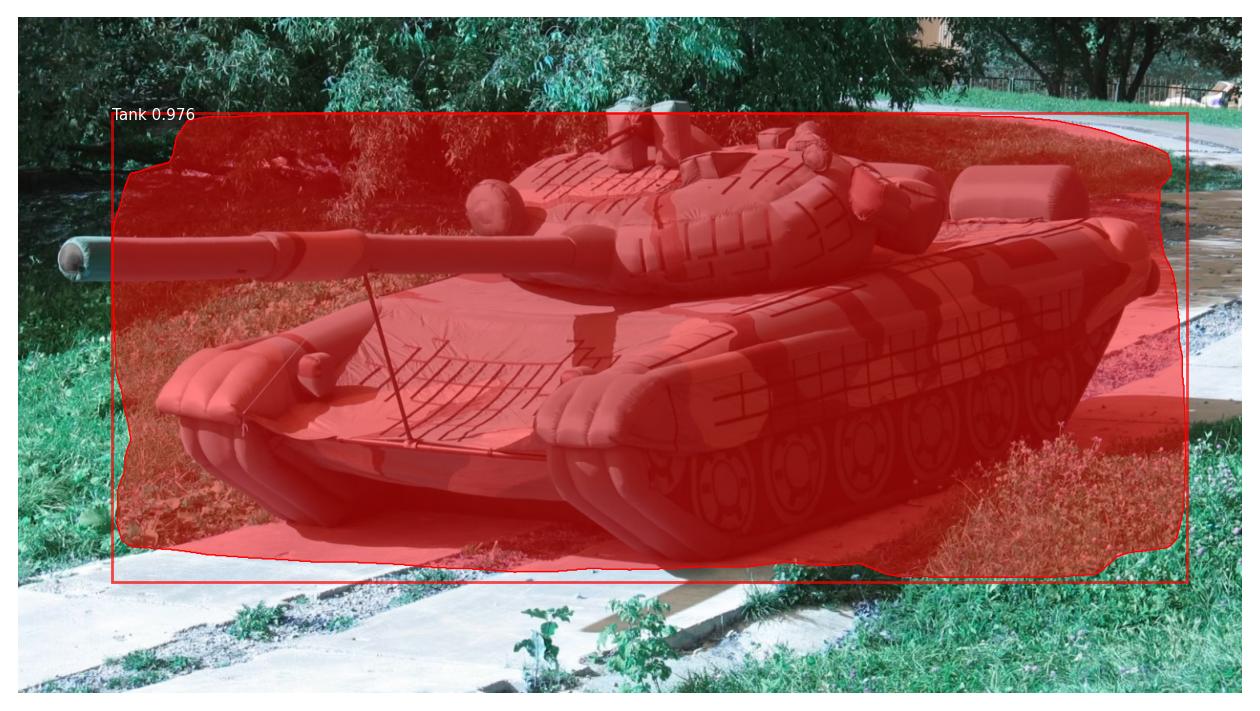

In [199]:
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=class_names, 
                                  scores=r['scores'])

In [194]:
# Розділ тестів

In [30]:
test_set.image_reference(1) 

'D:/Tanks/Mask-RCNN-TF2-master/dataset/rename_train_photo/4501.jpg'

In [78]:
real_ids = []

In [79]:
predict_ids = []

In [80]:
scores = []

In [115]:
for i in range(100):
    masks, class_id = test_set.load_mask(i)
    image_path = test_set.image_reference(i)
    image = cv2.imread(image_path)
    check = model.detect([image], verbose=0)
    check = check[0]
    real_ids.append(class_id)
    predict_ids.append(check['class_ids'])
    scores.append(check['scores'])

In [116]:
def calculate_accuracy(predicted_classes, true_classes):
    
    correct_predictions = 0
    total_predictions = 0
    
    for i in range(len(predicted_classes)):
        for j in range(len(predicted_classes[i])):
            if len(predicted_classes[i])<=len(true_classes[i]):
                total_predictions += 1
                if predicted_classes[i][j] == true_classes[i][j]:
                    correct_predictions += 1
    return correct_predictions / total_predictions

In [117]:
accuracy = calculate_accuracy(predict_ids, real_ids)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.71


In [118]:
accuracy

0.7095375722543352

In [200]:
def tanks_accuracy(predicted_classes, true_classes):
    
    correct_predictions = 0
    total_predictions = 0
    
    for i in range(len(predicted_classes)):
        for j in range(len(predicted_classes[i])):
            if len(predicted_classes[i])<=len(true_classes[i]) and 4 in predicted_classes[i] and len(true_classes[i])==1:
                total_predictions += 1
                if predicted_classes[i][j] == true_classes[i][j]:
                    correct_predictions += 1
    return correct_predictions / total_predictions

In [201]:
accuracy = tanks_accuracy(predict_ids, real_ids)

In [202]:
accuracy

0.9033816425120773